# Assignment 4(due on 12/06)

## Student:刘骐鸣（12332334），Gtihub：LIUQiming6
## 批改人：吴昊天


## 得分：28/30

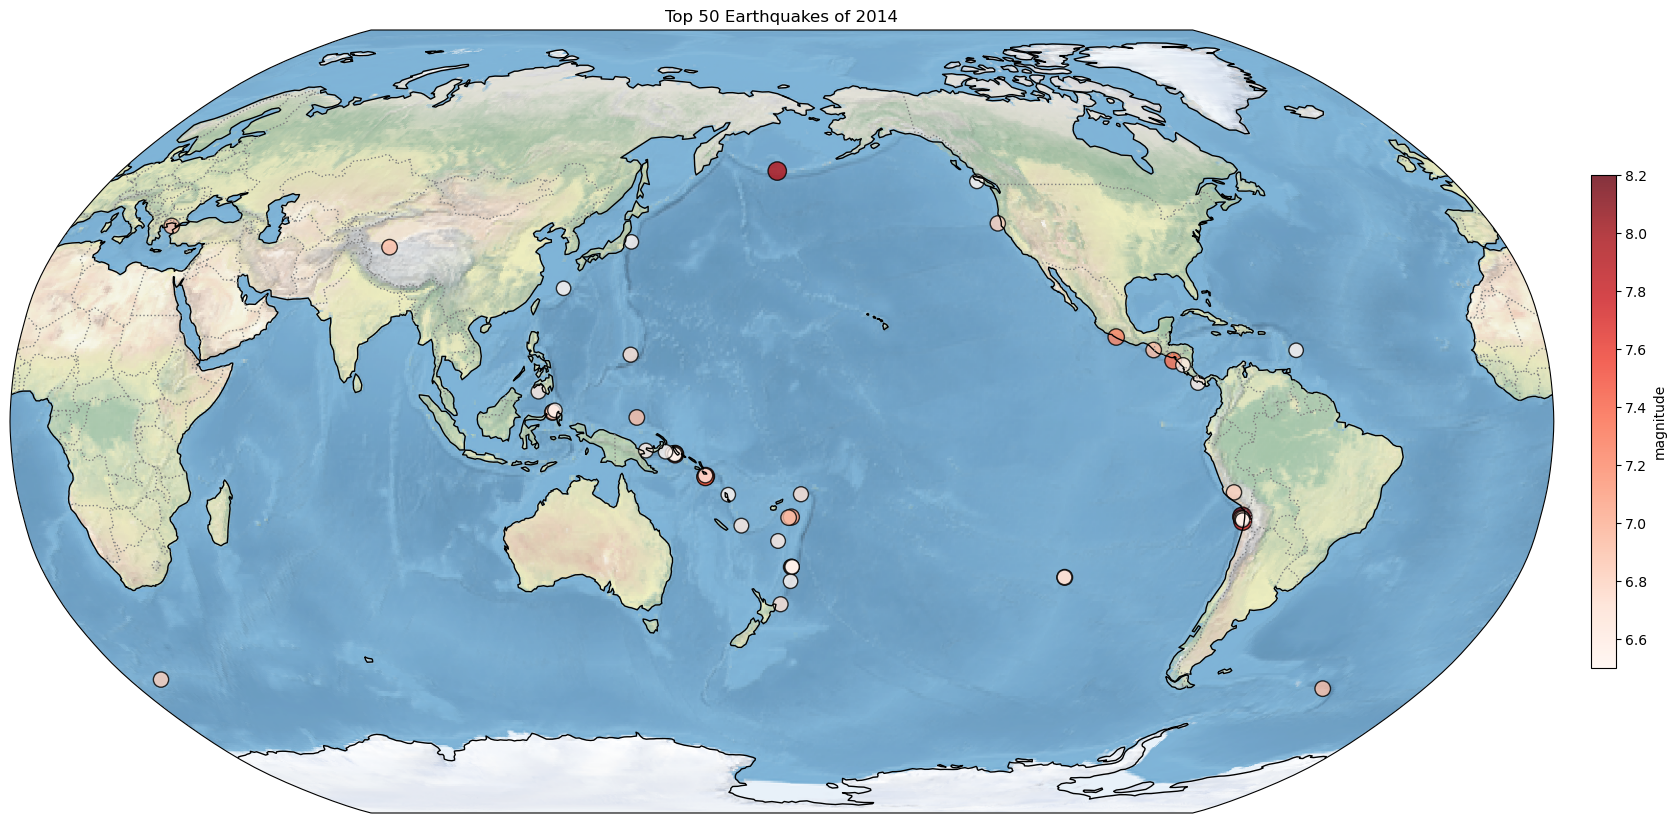

In [1]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import netCDF4 as nc

# Show plots in the notebook
ds = pd.read_csv('usgs_earthquakes.csv')
ds
ds1 = ds.sort_values(by='mag', ascending=False).head(50)
ds1
# 创建地图投影

fig, ax = plt.subplots(figsize=(24, 16), subplot_kw={'projection': ccrs.Robinson(central_longitude=180)})
ax.set_global()
# 添加海岸线、边界和国家
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')

# 获取经度、纬度和震级数据
lons = ds1['longitude'].values
lats = ds1['latitude'].values
magnitudes = ds1['mag'].values

# 标记地震点位
sc = ax.scatter(lons, lats, c=magnitudes, cmap='Reds', s=magnitudes ** 2.5, alpha=0.8, edgecolors='k', linewidth=1,
                transform=ccrs.PlateCarree())

# 添加颜色条
cbar = plt.colorbar(sc, orientation='vertical', pad=0.02, aspect=20, shrink=0.4)
cbar.set_label('magnitude')

# 添加标题
plt.title('Top 50 Earthquakes of 2014')
ax.stock_img()  #添加地球背景
# 显示图形
plt.show()

### 第一题代码运行正常，图件正确。
### 得分：10/10
### --------------------------------------------------------------------------------------------

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# 读取 NetCDF 文件  # 替换为实际的文件路径
ds = xr.open_dataset('SNDR.J1.ATMS.202207.M01.L3_RAMSES2.std.v03_24.G.230413193930.nc')
ds

<xarray.Dataset>
Dimensions:              (air_pres_stand: 27, air_pres_h2o_stand: 11,
                          orbit_pass: 2, lat: 180, lon: 360, bnds_1d: 2,
                          utc_tuple: 8)
Coordinates:
  * air_pres_stand       (air_pres_stand) float32 1e+05 9.25e+04 ... 20.0 10.0
  * air_pres_h2o_stand   (air_pres_h2o_stand) float32 1e+05 9.25e+04 ... 1.5e+04
    obs_time_tai93       (orbit_pass) datetime64[ns] ...
  * lon                  (lon) float32 -179.5 -178.5 -177.5 ... 178.5 179.5
  * lat                  (lat) float32 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * orbit_pass           (orbit_pass) timedelta64[ns] 13:30:00 01:30:00
    utc_tuple_lbl        (utc_tuple) object ...
Dimensions without coordinates: bnds_1d, utc_tuple
Data variables: (12/14)
    air_temp             (orbit_pass, air_pres_stand, lat, lon) float32 ...
    surf_air_temp        (orbit_pass, lat, lon) float32 ...
    surf_temp            (orbit_pass, lat, lon) float32 ...
    h2o_vap_tot          (orbit_pass, lat, lon) float32 ...
    spec_hum             (orbit_pass, air_pres_h2o_stand, lat, lon) float32 ...
    rel_hum              (orbit_pass, air_pres_h2o_stand, lat, lon) float32 ...
    ...                   ...
    surf_alt             (orbit_pass, lat, lon) float32 ...
    prior_surf_pres      (orbit_pass, lat, lon) float32 ...
    obs_time_tai93_bnds  (orbit_pass, bnds_1d) datetime64[ns] ...
    obs_time_utc         (orbit_pass, utc_tuple) float32 ...
    lon_bnds             (lon, bnds_1d) float32 ...
    lat_bnds             (lat, bnds_1d) float32 ...
Attributes: (12/71)
    keywords:                          ATMOSPHERE > ATMOSPHERIC TEMPERATURE >...
    Format:                            netCDF
    Conventions:                       CF-1.6, ACDD-1.3
    history:                           Created on 2023-01-20T06:37:23.000Z by...
    source:                            ATMS instrument telemetry
    processing_level:                  L3 gridding with Comprehensive QC appl...
    ...                                ...
    qa_no_data:                        FALSE
    title:                             Sounder SIPS: Level-3 RAMSES-2 JPSS-1 ...
    summary:                           The Level-3 RAMSES-2 monthly product i...
    shortname:                         SNDRJ1ML3MRMS
    metadata_link:                     http://disc.sci.gsfc.nasa.gov/
    references:

C:\Users\Wu\AppData\Local\Temp\ipykernel_448\4086980984.py:5: RuntimeWarning: Mean of empty slice
  nh3 = np.nanmean(nh3, 0)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


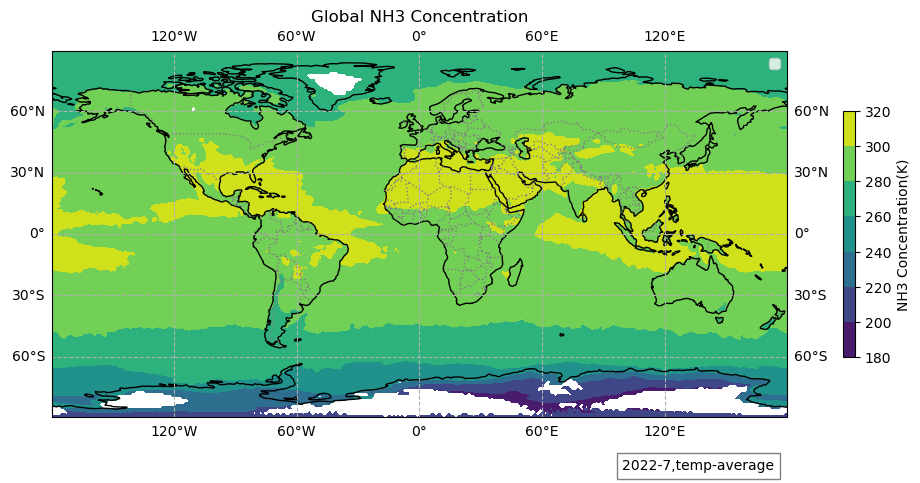

In [4]:
# 获取经度、纬度和 NH3 浓度数据
lons = ds['lon'].values
lats = ds['lat'].values
nh3 = ds['surf_temp'].values  # 替换为实际的变量名
nh3 = np.nanmean(nh3, 0)
# 创建二维网格
lon_2d, lat_2d = np.meshgrid(lons, lats)
# 创建地图投影
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# 添加地图特征
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
# 绘制 NH3 浓度分布
cmap = plt.get_cmap('viridis')  # 替换为实际的颜色映射
im = ax.contourf(lon_2d, lat_2d, nh3, cmap=cmap, transform=ccrs.PlateCarree())
# 添加颜色条
cbar = plt.colorbar(im, orientation='vertical', pad=0.06, aspect=20, shrink=0.4, label='NH3 Concentration(K)')
# 添加标题
plt.title('Global NH3 Concentration')
# 添加网格线
ax.gridlines(draw_labels=True, linestyle='--')
# 添加坐标轴标签
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# 添加图例
ax.legend()
# 添加文本框
fig.text(0.6, 0.2, '2022-7,temp-average', bbox=dict(facecolor='white', alpha=0.5))

# 显示图形
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
d:\software\anaconda\envs\TA\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_countries.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


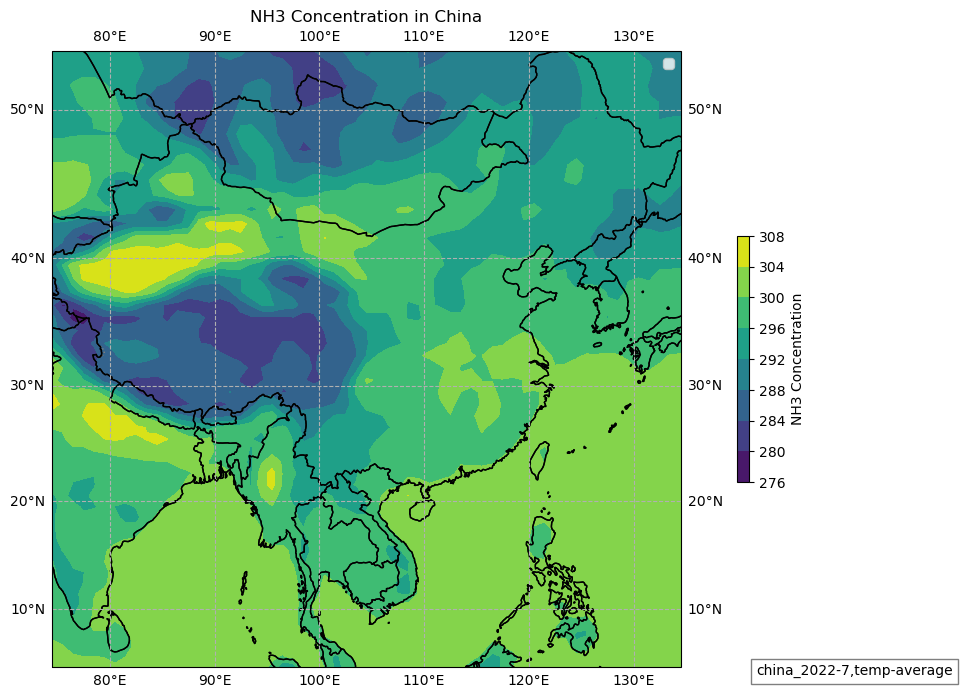

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 假设 nh3 是一个二维数组，表示全球 NH3 浓度数据
# 假设 lons 和 lats 是对应的经纬度信息

# 获取中国区域的经纬度索引
china_lon_indices = np.where((lons >= 73.6) & (lons <= 135.0))[0]
china_lat_indices = np.where((lats >= 3.86) & (lats <= 53.55))[0]

# 使用索引获取中国区域的 NH3 数据
nh3_china = nh3[china_lat_indices][:, china_lon_indices]

# 获取中国区域的经度和纬度信息
lons_china = lons[china_lon_indices]
lats_china = lats[china_lat_indices]

# 创建二维网格
lon_2d_china, lat_2d_china = np.meshgrid(lons_china, lats_china)

# 创建地图投影（不同的投影）
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.Mercator()})

# 添加地图特征
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
countries = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='50m',
    facecolor='none',
    edgecolor='black'
)
ax.add_feature(countries)

# 绘制中国区域 NH3 浓度分布
cmap = plt.get_cmap('viridis')  # 替换为实际的颜色映射
im = ax.contourf(lon_2d_china, lat_2d_china, nh3_china, cmap=cmap, transform=ccrs.PlateCarree())
# 添加颜色条
cbar = plt.colorbar(im, orientation='vertical', pad=0.06, aspect=20, shrink=0.4, label='NH3 Concentration')
# 添加标题
plt.title('NH3 Concentration in China')
# 修改坐标轴标签
ax.set_xlabel('Longitude (Mercator)')
ax.set_ylabel('Latitude (Mercator)')
# 添加网格线
ax.gridlines(draw_labels=True, linestyle='--')
# 添加图例
ax.legend()
# 添加文本框
fig.text(0.8, 0.1, 'china_2022-7,temp-average', bbox=dict(facecolor='white', alpha=0.5))
# 显示图形
plt.show()

### 第二题代码运行正常，图件正确，缺少要素。
### 2.1和2.2都有： a project, x label and ticks, y label and ticks, title, gridlines, colorbar and text box
### 有提示“No artists with labels found to put in legend.”
### 得分：18/20
### --------------------------------------------------------------------------------------------